## 3. Implémentation

In [39]:
import matplotlib.pyplot as plt
from qiskit import Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import Diagonal
from qiskit.visualization import plot_histogram
import math

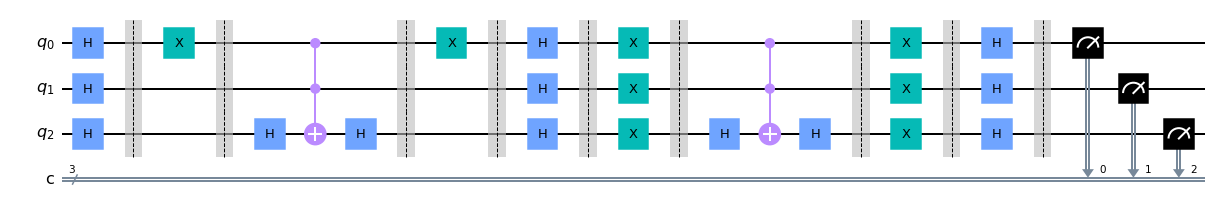

In [100]:
# Etape 1
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.h(1)
circ.h(2)
circ.barrier()
#Etape 2
circ.x(0)
circ.barrier()
# Etape 3
circ.h(2)
circ.ccx(0,1,2)
circ.h(2)
circ.barrier()
circ.x(0)
circ.barrier()
# Etape 4
circ.h(0)
circ.h(1)
circ.h(2)
circ.barrier()
# Etape 5
circ.x(0)
circ.x(1)
circ.x(2)
circ.barrier()
circ.h(2)
circ.ccx(0,1,2)
circ.h(2)
circ.barrier()
# Etape 6
circ.x(0)
circ.x(1)
circ.x(2)
circ.barrier()
circ.h(0)
circ.h(1)
circ.h(2)
circ.barrier()
circ.measure(0,0)
circ.measure(1,1)
circ.measure(2,2)


# Simulation des résultats
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(circ, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

#circ.draw('mpl')

## 4 Questions

### 1. Code général

In [73]:
# Initialisation en mettant une porte H sur tout les qubits 
def Initialize(qc, nb):
    for q in range(nb):
        qc.h(q)
    return qc


# Opérateur de diffusion de Grover
def Diffuser(nqubits):
    qc = QuantumCircuit(nqubits)

    for qubit in range(nqubits): # On applique une porte d'Hadamard puis une porte X pour chaque Qubit.
        qc.h(qubit)
        qc.x(qubit)

    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # On applique une porte X au dernier Qubit contrôlé par tous les autres Qubits
    qc.h(nqubits-1)

    for qubit in range(nqubits): # On applique une porte X puis une porte d'Hadamard pour chaque Qubit.
        qc.x(qubit)
        qc.h(qubit)
    
    diff = qc.to_gate()
    diff.name = "Diff"
    return diff

# Oracle de Grover
def Oracle(n, it=0):
    it = it % 2**n
    diagonal_elements = [1]*it+[-1]+[1]*(2**n-it-1)
    oracle_gate = Diagonal(diagonal_elements)
    oracle_gate.name = "Oracle"
    return oracle_gate


### 2. On retrouve 101, 001, 010

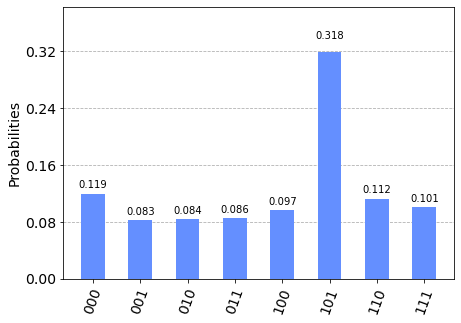

In [82]:
i = 101
n = len(str(i))
nb_it = 0
circ = [*range(n)]
qc = QuantumCircuit(n)
qc = Initialize(qc, n)

# Iterations #
while (nb_it < math.sqrt(2**n)):
    qc.append(Oracle(n, i), circ)
    qc.append(Diffuser(n), circ)
    nb_it+=1

# Mesures #
qc.measure_all()


# Calculation #
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(qc, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

#qc.draw('mpl')


### 3. Il faut 6 Itérations pour retrouver 10101

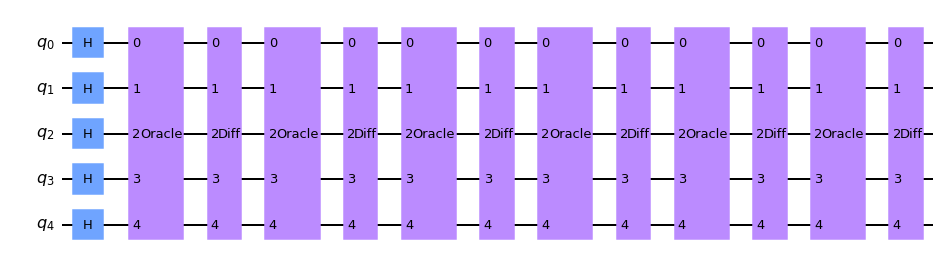

In [88]:
i = 10101
n = len(str(i))
nb_it = 0
circ = [*range(n)]
qc = QuantumCircuit(n)
qc = Initialize(qc, n)

# Iterations #
while (nb_it < math.sqrt(2**n)):
    qc.append(Oracle(n, i), circ)
    qc.append(Diffuser(n), circ)
    nb_it+=1
    
qc.draw('mpl')

### 4. On remarque que les résultats sont incohérents.  Avec 3 itérations, les résultats sont plus précis mais pas assez pour être exploitable

In [96]:
qc = QuantumCircuit(n)
qc = Initialize(qc, n)

# Iterations #
while (nb_it <2):
    qc.append(Oracle(n, i), circ)
    qc.append(Diffuser(n), circ)
    nb_it+=1
    
qc.measure_all()

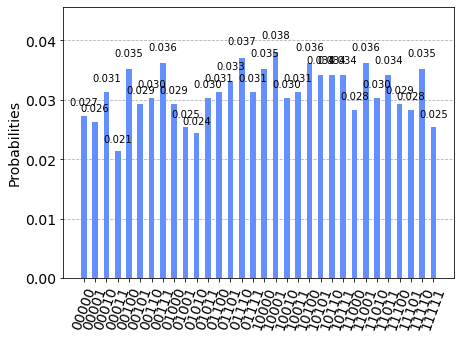

In [97]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(qc, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

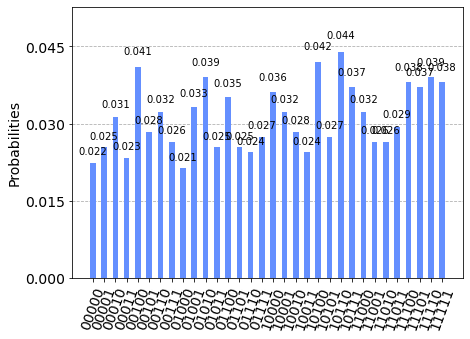

In [101]:
qc = QuantumCircuit(n)
qc = Initialize(qc, n)

# Iterations #
while (nb_it <3):
    qc.append(Oracle(n, i), circ)
    qc.append(Diffuser(n), circ)
    nb_it+=1
    
qc.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(qc, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)